In [18]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import string
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

ModuleNotFoundError: No module named 'nltk'

In [19]:
pip install nltk

     ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
     ------------ --------------------------- 0.5/1.5 MB 14.4 MB/s eta 0:00:01
     -------------------------------- ------- 1.2/1.5 MB 19.5 MB/s eta 0:00:01
     ---------------------------------------- 1.5/1.5 MB 16.0 MB/s eta 0:00:00
  Obtaining dependency information for regex>=2021.8.3 from https://files.pythonhosted.org/packages/de/cd/d80c9e284ae6c1b2172dacf0651d25b78ee1f7efbc12d74ea7b87c766263/regex-2023.8.8-cp311-cp311-win_amd64.whl.metadata
     ---------------------------------------- 0.0/42.0 kB ? eta -:--:--
     ---------------------------------------- 42.0/42.0 kB ? eta 0:00:00
   ---------------------------------------- 0.0/268.3 kB ? eta -:--:--
   --------------------------------------- 268.3/268.3 kB 16.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [6]:
#load dataset with electives
elective_df = pd.read_excel("data/tekems_section_demand_20230124_1930.xlsx")
print(elective_df.shape)
course_names = elective_df.course_name.unique()

courses = pd.DataFrame(course_names, columns=['name'])
courses

(2166, 36)


,name
0,Corporate Finance
1,Macroeconomic Analysis
2,Banking
3,Negotiation Strategy
4,Mastering Your Career
...,...
306,Systematic Investment
307,Media and Politics
308,Hospitality Expansion & Internationalization
309,Applied Hospitality & CX Innovation


In [7]:
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(courses['name'])

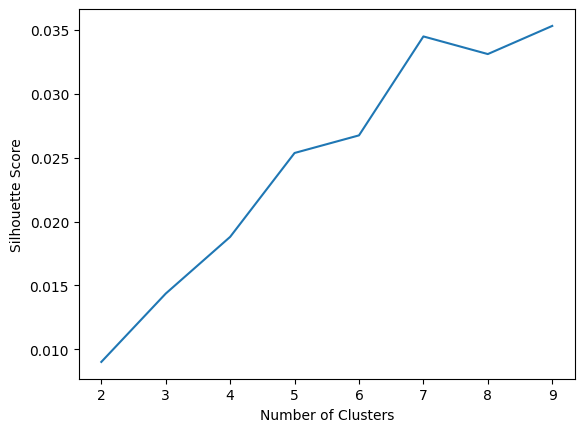

In [8]:
scores = []
range_values = range(2, min(10, len(courses)))

for i in range_values:
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=100, n_init=1)
    kmeans.fit(X)
    scores.append(silhouette_score(X, kmeans.labels_))

plt.plot(range_values, scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [10]:
optimal_clusters = scores.index(max(scores)) + 2  # +2 because the range_values starts from 2
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=100, n_init=1, random_state=42)
kmeans.fit(X)
courses['cluster'] = kmeans.labels_

In [14]:
courses[courses["cluster"]==4]

,name,cluster
0,Corporate Finance,4
13,Applied Corporate Governance,4
28,Applied Corporate Finance,4
29,Entrepreneurial Finance & Venture Capital,4
47,Corporate Governance,4
54,Empirical Methods for Finance,4
56,Public Finance,4
69,Finance - Introductory,4
95,Behavioral Economics and Finance,4
98,Corporate Valuation,4


## With Syllabus

In [25]:
# Sample array of course names and syllabi
course_data = [
    {"name": "Introduction to Computer Science", "syllabus": "Programming and Algorithms and Data Structures"},
    {"name": "Advanced Mathematics", "syllabus": "Calculus, Linear Algebra, Statistics"},
    {"name": "Physics", "syllabus": "Mechanics, Electricity, Magnetism ."},
    {"name": "Computer Programming", "syllabus": "Java, & Python, C++"},
    {"name": "Calculus", "syllabus": "Limits, Derivatives, Integrals"},
    {"name": "Statistics", "syllabus": "Probability, Inferential Statistics"},
    {"name": "Data Structures", "syllabus": "Arrays, Linked Lists, Trees"},
    {"name": "Algorithms", "syllabus": "Sorting, Searching, Graph Algorithms"}
]

# Transforming the array into a DataFrame named courses
courses = pd.DataFrame(course_data)
courses

,name,syllabus
0,Introduction to Computer Science,Programming and Algorithms and Data Structures
1,Advanced Mathematics,"Calculus, Linear Algebra, Statistics"
2,Physics,"Mechanics, Electricity, Magnetism ."
3,Computer Programming,"Java, & Python, C++"
4,Calculus,"Limits, Derivatives, Integrals"
5,Statistics,"Probability, Inferential Statistics"
6,Data Structures,"Arrays, Linked Lists, Trees"
7,Algorithms,"Sorting, Searching, Graph Algorithms"


In [23]:
#import nltk
#nltk.download('stopwords')

import string
from nltk.corpus import stopwords

In [27]:
import string
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

# Merge manual_stop_words, fill_words, and NLTK stop words
manual_stop_words = set([
    'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your',
    'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it',
    "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this',
    'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
    'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while',
    'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',
    'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then',
    'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other',
    'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will',
    'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't",
    'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't",
    'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn',
    "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"
])

fill_words = set(['um', 'uh', 'mmm', 'hmm', 'ahh'])
nltk_stop_words = set(stopwords.words('english'))
all_stop_words = manual_stop_words.union(fill_words, nltk_stop_words)

def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation and special characters
    tokens = text.split()  # Tokenization (split the text into words)
    tokens = [word for word in tokens if word not in all_stop_words]  # Remove all stop words and fill words
    return ' '.join(tokens)  # Join the tokens back into a string

courses['syllabus'] = courses['syllabus'].apply(preprocess_text)  # Apply preprocessing to each syllabus

vectorizer = TfidfVectorizer()  # Initialize the TfidfVectorizer
X_preprocessed = vectorizer.fit_transform(courses['syllabus'])  # Apply the vectorizer to the preprocessed syllabus column
X_preprocessed.shape, courses

((8, 25),
                                name                                syllabus
 0  Introduction to Computer Science  programming algorithms data structures
 1              Advanced Mathematics      calculus linear algebra statistics
 2                           Physics         mechanics electricity magnetism
 3              Computer Programming                           java python c
 4                          Calculus            limits derivatives integrals
 5                        Statistics      probability inferential statistics
 6                   Data Structures               arrays linked lists trees
 7                        Algorithms      sorting searching graph algorithms)

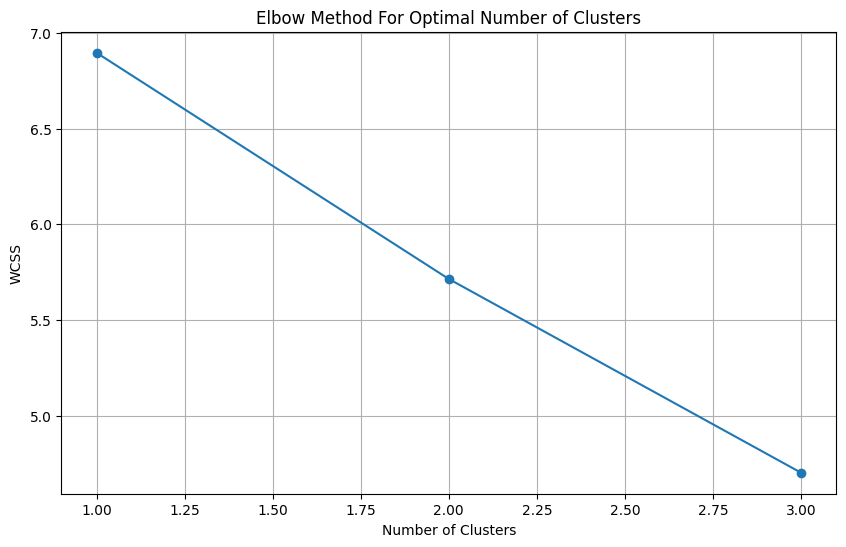

In [29]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Calculate the WCSS for different numbers of clusters
wcss = []
max_clusters = 3  # You can change this value depending on how many clusters you want to test
for i in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_preprocessed)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(10,6))
plt.plot(range(1, max_clusters + 1), wcss, marker='o')
plt.title('Elbow Method For Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [34]:
# After determining the optimal number of clusters from the Elbow graph,
# Perform K-Means Clustering with that number of clusters and assign the labels back to the original DataFrame.
optimal_clusters = 4  # Replace with the optimal number you observe
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
courses['cluster'] = kmeans.fit_predict(X_preprocessed)

In [35]:
courses

,name,syllabus,cluster
0,Introduction to Computer Science,programming algorithms data structures,1
1,Advanced Mathematics,calculus linear algebra statistics,0
2,Physics,mechanics electricity magnetism,1
3,Computer Programming,java python c,1
4,Calculus,limits derivatives integrals,2
5,Statistics,probability inferential statistics,0
6,Data Structures,arrays linked lists trees,3
7,Algorithms,sorting searching graph algorithms,1
